In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/praktikum11_ML/iris"

Mounted at /content/gdrive


In [3]:
df = pd.read_csv(path + '/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncodered"] = le.fit_transform(df["Species"])


In [10]:
X = df.drop(["Id", "SpeciesEncodered"], axis=1)

CEK VARIASI DATANYA


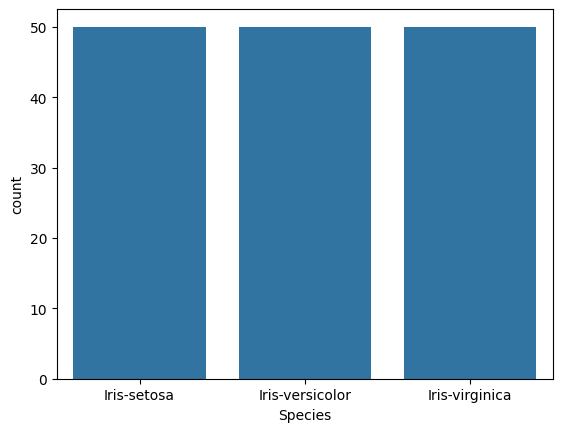

In [11]:
sns.countplot(x="Species", data=df)
plt.show()

In [12]:
X[10:16]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


In [13]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


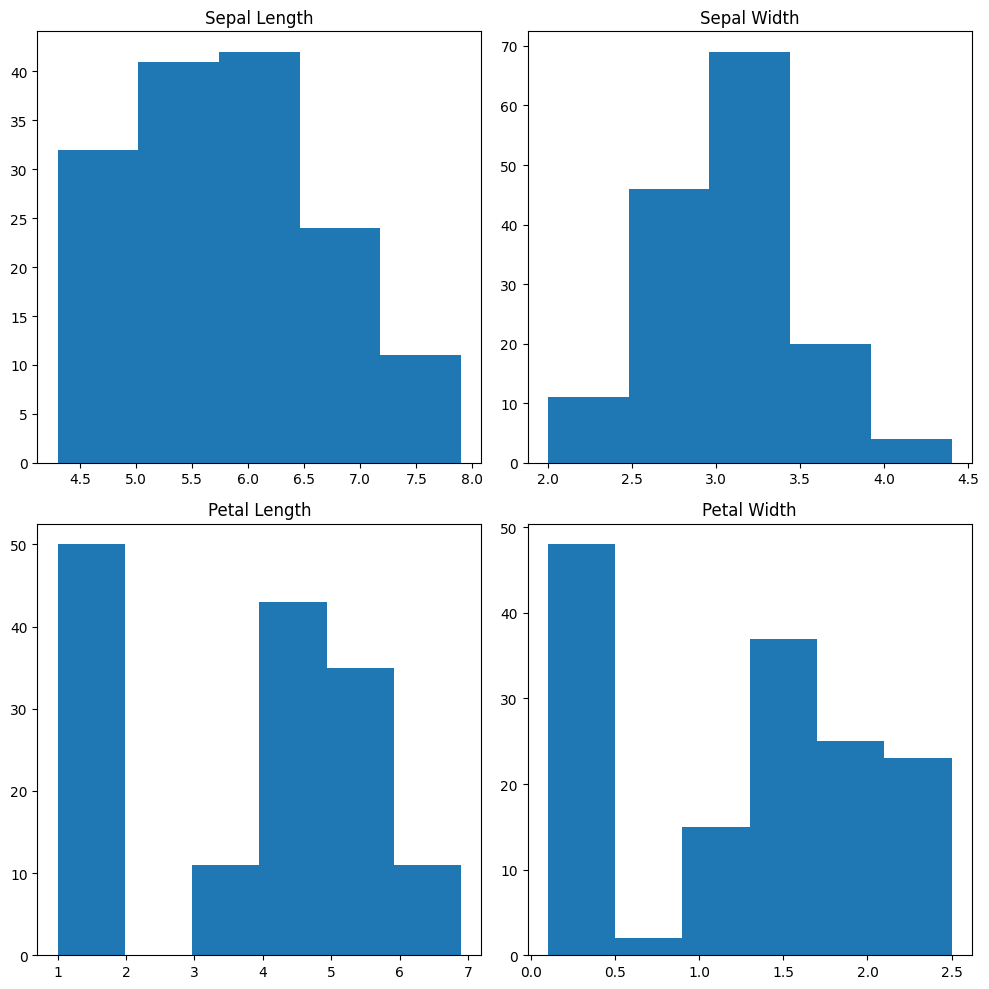

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1: Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(df['SepalLengthCm'], bins=5)

# Histogram 2: Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(df['SepalWidthCm'], bins=5)

# Histogram 3: Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(df['PetalLengthCm'], bins=6)

# Histogram 4: Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(df['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Re-initialize X from the original DataFrame: 'df'
# This ensures X is a DataFrame with named columns for indexing before scaling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Now apply the scaling
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [16]:
#Standarisasi
scaler = StandardScaler()
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x = scaler.fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

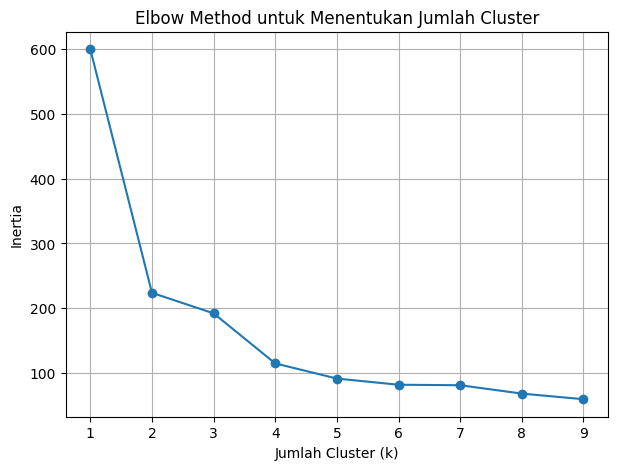

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Ensure X contains only numerical features and is scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

inertia_list = []
K_range = range(1, 10)

for k in K_range:
  km = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init for newer sklearn versions
  km.fit(X_scaled) # Use the scaled numerical data
  inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,           #Karena dataset Iris ada 3 Species
    init="k-means++",
    random_state=42
)

In [19]:
df["Cluster"] = kmeans.fit_predict(X_scaled)
print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


In [20]:
# Latih model (menentukan centroid + proses clustering)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [28]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n========== SILHOUETTE SCORE ==========")
print("SIlhouette Score:", sil_score)


========== SILHOUETTE SCORE ==========
SIlhouette Score: 0.4787241921049546


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n==== CONFUSION MATRIX ======")
cm = confusion_matrix(df["SpeciesEncodered"], df["Cluster"])
print(cm)


==== CONFUSION MATRIX ======
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


In [21]:
# prediksi cluster untuk data X
labels = kmeans.predict(X)

In [22]:
# Masukkan ke Dataframe
df["Cluster"] = labels

In [23]:
#df["Cluster"] = kmeans.fit_predict(X)
print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


In [24]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels) # Using the 'labels' array generated by kmeans.predict(X)

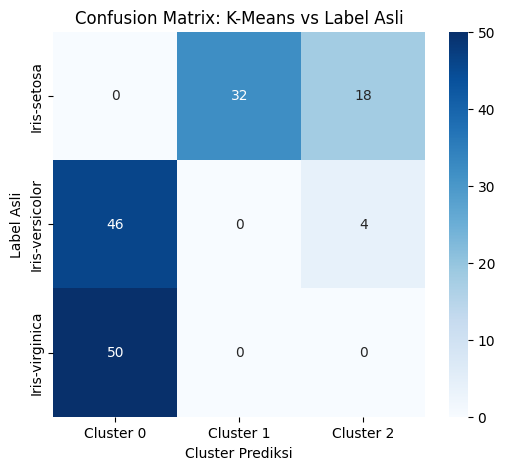

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

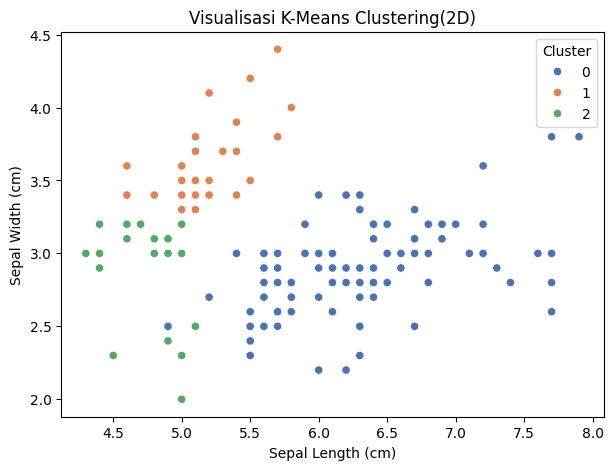

In [36]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering(2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

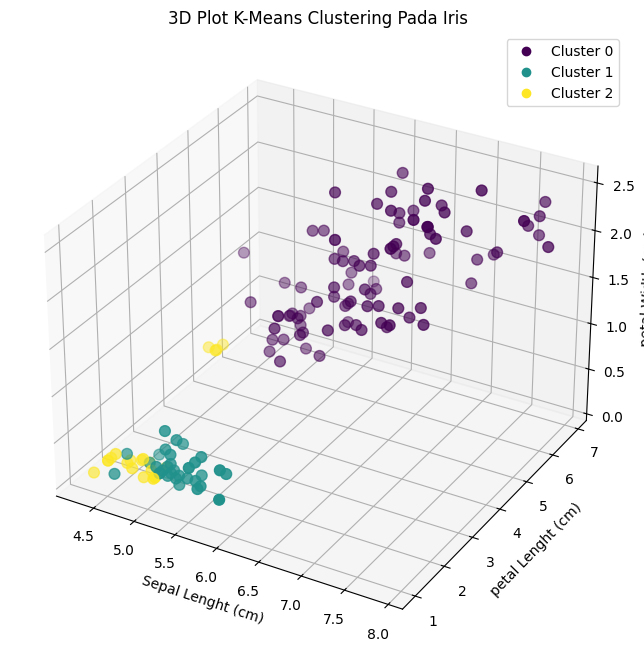

In [38]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering Pada Iris")
ax.set_xlabel("Sepal Lenght (cm)")
ax.set_ylabel("petal Lenght (cm)")
ax.set_zlabel("petal Width (cm)")

# Legend Cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()